# Capítulo 6: Árbol de Decisión

## Árboles de Decisión — Qué son y para qué sirven

---

## 1. Clasificación con Árboles de Decisión
**Qué es:**  
Un árbol de decisión es un modelo que divide los datos en regiones basadas en preguntas secuenciales (nodos), permitiendo clasificar ejemplos siguiendo un camino desde la raíz hasta una hoja.

**Para qué sirve:**  
- Resolver problemas de **clasificación** binaria o multiclase.  
- Tomar decisiones interpretables paso a paso.  
- Trabajar sin necesidad de escalar características.  
- Descubrir interacciones no lineales entre variables.

---

## 2. Probabilidades en Árboles de Decisión
**Qué es:**  
Las probabilidades se calculan a partir de la proporción de ejemplos de cada clase dentro de una hoja del árbol.

**Para qué sirve:**  
- Obtener predicciones probabilísticas y no solo etiquetas.  
- Interpretar el nivel de confianza del modelo.  
- Evaluar riesgos o umbrales en problemas sensibles.

---

## 3. Regresión con Árboles de Decisión
**Qué es:**  
Una variante del árbol de decisión que predice valores numéricos. En lugar de asignar clases, cada hoja contiene un valor promedio del objetivo.

**Para qué sirve:**  
- Resolver problemas de **regresión** con relaciones no lineales.  
- Modelar interacciones complejas sin necesidad de transformar variables.  
- Crear modelos interpretables que dividen el espacio en regiones con valores constantes.



## <span style="color:green">1. Clasificación</span>

In [1]:
#Importar los bibliotecas
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os 

In [2]:
import pandas as pd

# Base del repositorio
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/a2Proyectos/MachineLearning_Data/main/"

# Dataset a utilizar
COMEDIANTES = "Capitulo_6/Comediantes.csv"

# Función para cargar datos
def cargar_datos(ruta):
    return pd.read_csv(DOWNLOAD_ROOT + ruta)


In [4]:
# Checar los datos
df = cargar_datos(COMEDIANTES)
df.head()


,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES


In [6]:
from sklearn.preprocessing import LabelEncoder

# Copiamos el dataframe para no tocar el original
df_encoded = df.copy()

# Crear el encoder
le = LabelEncoder()

# Codificar Nationality y Go
df_encoded["Nationality"] = le.fit_transform(df_encoded["Nationality"])
df_encoded["Go"] = le.fit_transform(df_encoded["Go"])
df_encoded.head()



,Age,Experience,Rank,Nationality,Go
0,36,10,9,1,0
1,42,12,4,2,0
2,23,4,6,0,0
3,52,4,4,2,0
4,43,21,8,2,1


In [7]:
# Separar variables predictoras y objetivo
X = df_encoded.drop("Go", axis=1)
y = df_encoded["Go"]


In [8]:
print(X.shape)
print(y.shape)


(13, 4)
(13,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Crear el clasificador
tree_clf = DecisionTreeClassifier()

# Ajustar el modelo
tree_clf.fit(X, y)


DecisionTreeClassifier(random_state=42)

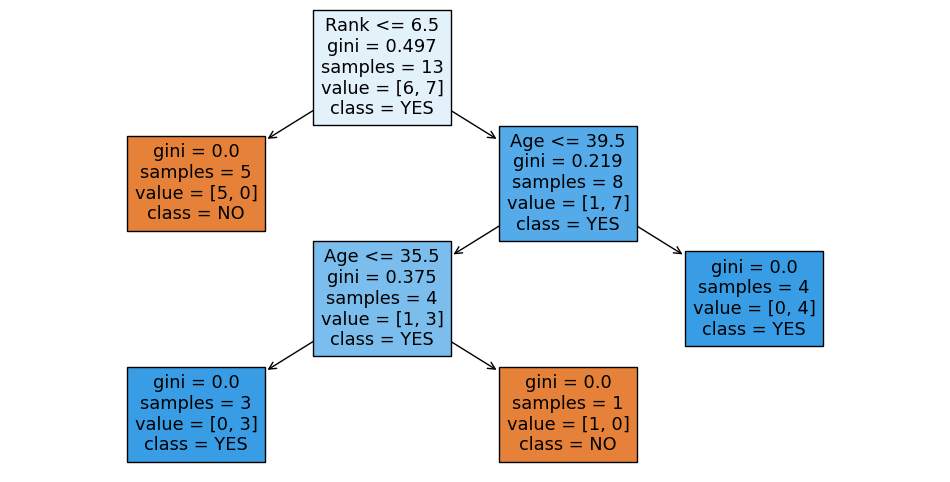

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plot_tree(
    tree_clf,
    feature_names=X.columns,
    class_names=["NO", "YES"],
    filled=True
)
plt.show()


***

## <span style="color:green">2. Probabilidades</span>

También permite estimar probabilidades. Lo veremos con un ejemplo:

In [12]:
# Persona aleatoria (puedes cambiar los valores)
persona = [[3, 20, 2, 2]]  
# Age, Experience, Rank, Nationality (codificada)

# Probabilidad de NO / YES
tree_clf.predict_proba(persona)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[1., 0.]])

 -El orden de las variables esta como: **Edad, experiencia, rango y nacionalidad**

El resultado esta como : lado izquierdo= No comediante - lado derecho=Comediante

---

## <span style="color:green">3. Regresión</span>

Los árboles de decisión tambien pueden hacer regresiones lineales.

In [14]:
import numpy as np

# Generar 100 valores y añadir aleatoriedad
X = np.c_[np.random.rand(100)]
y = X + 0.2 * np.random.rand(100, 1)


In [15]:
from sklearn.tree import DecisionTreeRegressor

# Árbol de decisión con profundidad máxima 2
tree_reg = DecisionTreeRegressor(max_depth=2)

# Ajustar el modelo
tree_reg.fit(X, y)


DecisionTreeRegressor(max_depth=2)

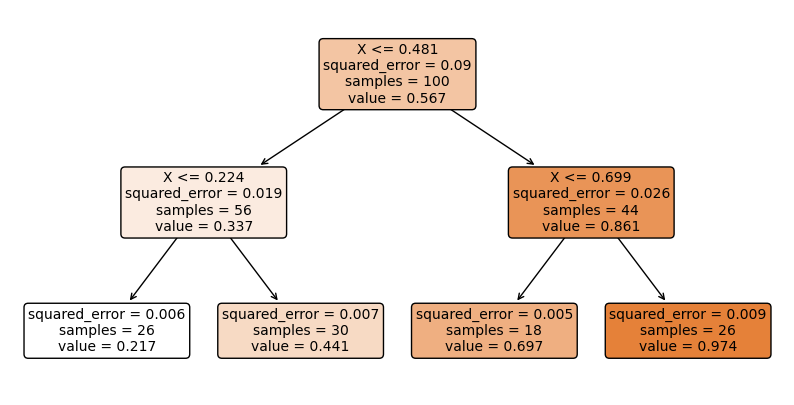

In [16]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plot_tree(
    tree_reg,
    feature_names=["X"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()


Recuerda que pusimos una profundidad máxima de 2, esto lo decides tu con base a tus objetivos.

KEY: **mse**= Mean Square Error es equivalente al GINI. Te indica el nivel de impureza. **nsamples=** Cantidad de muestras por nodo. **nvalue=** Valor

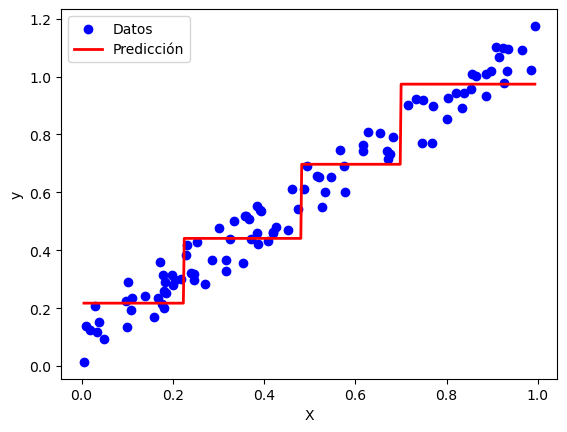

In [20]:
# Generar una malla de puntos para graficar la predicción
X_test = np.linspace(X.min(), X.max(), 500).reshape(-1,1)
y_pred = tree_reg.predict(X_test)

plt.scatter(X, y, c='blue', label='Datos')
plt.plot(X_test, y_pred, c='red', linewidth=2, label='Predicción')


plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


Los nodos se ven representados por cada linea rojo

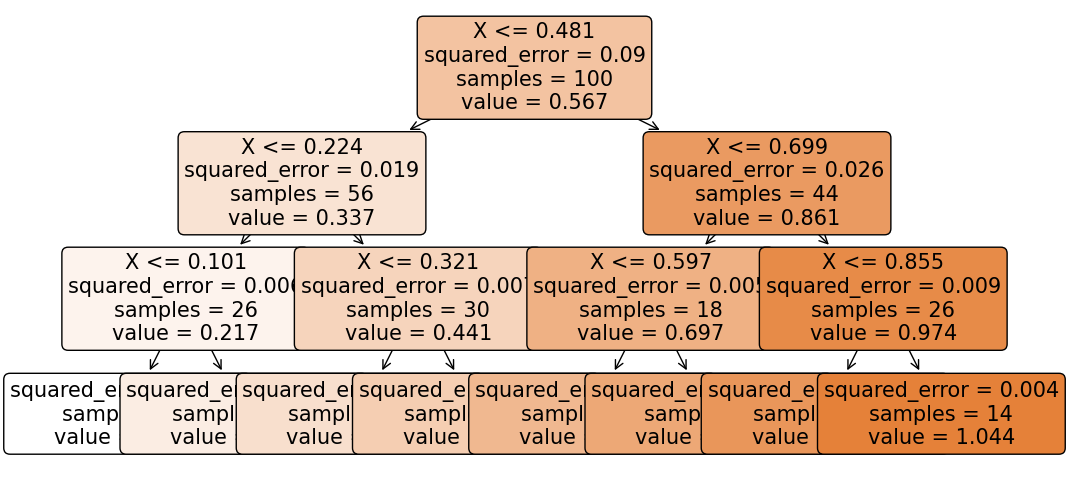

In [21]:
# Árbol de decisión con mayor profundidad
tree_reg2 = DecisionTreeRegressor(max_depth=3)
tree_reg2.fit(X, y)

# Graficar el árbol con más detalle
plt.figure(figsize=(12,6))
plot_tree(
    tree_reg2,
    feature_names=["X"],
    filled=True,
    rounded=True,
    fontsize=15
)
plt.show()


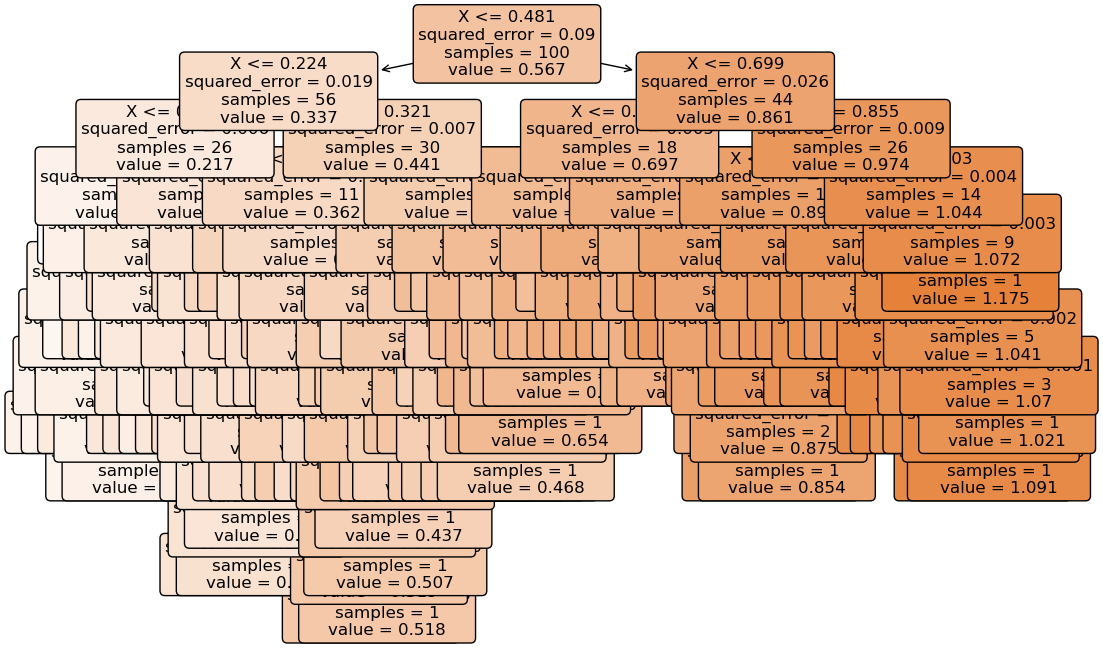

In [22]:
# Árbol de decisión sin restricciones
tree_reg_full = DecisionTreeRegressor(max_depth=None)
tree_reg_full.fit(X, y)

# Graficar el árbol completo
plt.figure(figsize=(12,8))
plot_tree(
    tree_reg_full,
    feature_names=["X"],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.show()
